In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency, chi2, mannwhitneyu, shapiro, kruskal
import statsmodels.api as sa 
import scikit_posthocs as sp

%matplotlib inline

In [6]:
df = pd.read_csv('taxi.csv')

In [8]:
df.isna().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [12]:
df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
luxury_car_user              bool
weekday_pct               float64
dtype: object

In [15]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

Add churn rate

In [19]:
df['days_since_last_trip'] = df.last_trip_date.max() - df.last_trip_date
df['days_since_last_trip'] = df['days_since_last_trip'].dt.days
df['churn'] = df.days_since_last_trip.apply(lambda x: 'churn' if x > 30 else 'not_churn')

is there the difference in churn between cities?

In [22]:
pd.crosstab(df.churn, df.city)

city,Astapor,King's Landing,Winterfell
churn,,,
churn,12306,3767,15123
not_churn,4228,6363,8213


lets use Chi-squared test

In [24]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df.churn, df.city))
stat, p

(3821.5510225559633, 0.0)

difference exists

Is there the difference in activities in the first 30 days?

<Figure size 1500x700 with 0 Axes>

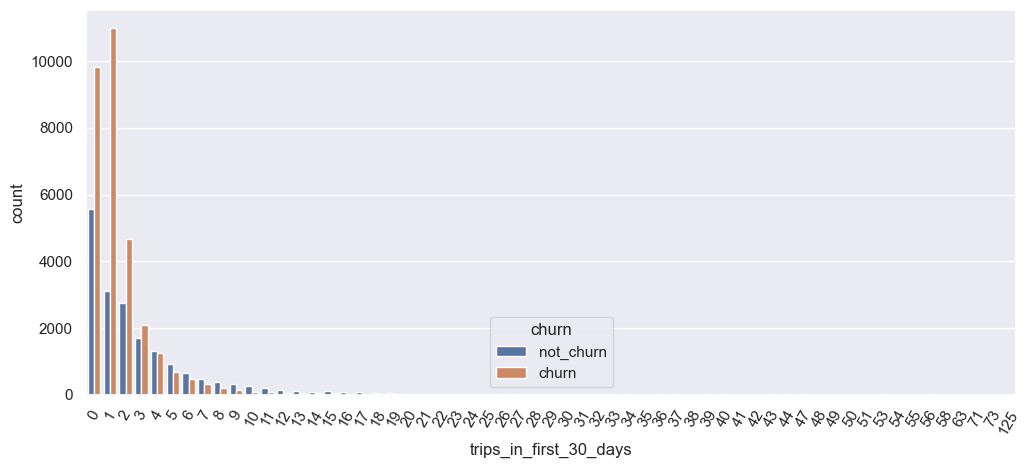

<Figure size 1500x700 with 0 Axes>

In [46]:
plt.xticks(rotation=60)
sns.countplot(data=df, x="trips_in_first_30_days", hue="churn")
plt.figure(figsize=(15,7))

In [55]:
shapiro(df[df.churn == "not_churn"].trips_in_first_30_days)

ShapiroResult(statistic=0.6397100687026978, pvalue=0.0)

In [53]:
shapiro(df[df.churn == "churn"].trips_in_first_30_days)

ShapiroResult(statistic=0.5490787029266357, pvalue=0.0)

Distributions are not normal. Let's use mann-whitneyu test

In [54]:
mannwhitneyu(df[df.churn == "not_churn"].trips_in_first_30_days, df[df.churn == "churn"].trips_in_first_30_days)

MannwhitneyuResult(statistic=351842132.0, pvalue=0.0)

the difference is statistically significant

In [57]:
df[df.churn == "not_churn"].trips_in_first_30_days.mean()

3.3063178047223993

In [58]:
df[df.churn == "churn"].trips_in_first_30_days.mean()

1.6584818566482882